In [1]:
import pandas as pd
import numpy as np
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data and explore 

In [2]:
# importing the data and prinitng few rows to examine the data
# read the CSV file 
df = pd.read_csv("codeset.csv", header=None) 
   
# print the first five rows 
print(df.head()) 

      0     1           2                                     3    4    5   \
0  37013  AFIB   314208002             Rapid atrial fibrillation  NaN  NaN   
1  37014  Afib  3320796013                        Atrial flutter  NaN  NaN   
2  37015  Afib  3322864015               Atypical atrial flutter  NaN  NaN   
3  37016  AFib   421232012   AF - Paroxysmal atrial fibrillation  NaN  NaN   
4  37017  Afib   421233019  PAF - Paroxysmal atrial fibrillation  NaN  NaN   

    6   7   8   9  10         11  12  13  14    15 16  \
0  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
1  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
2  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
3  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   
4  NaN NaN NaN NaN  f  SNOMED-CT  74 NaN NaN  4010  f   

                                     17  
0  3137fbd7-551e-4e7e-96f8-13b12a867098  
1  3137fbd7-551e-4e7e-96f8-13b12a867098  
2  3137fbd7-551e-4e7e-96f8-13b12a867098  
3  3137fbd7-551e-4e7

In [3]:
print(df.shape)

(32413, 18)


In [4]:
# selecting only the columns present in the problem statement
select_columns_index = [3,15]
df = df.iloc[:,select_columns_index]

In [5]:
print(df.shape)

(32413, 2)


In [6]:
print(df.head()) 

                                     3     15
0             Rapid atrial fibrillation  4010
1                        Atrial flutter  4010
2               Atypical atrial flutter  4010
3   AF - Paroxysmal atrial fibrillation  4010
4  PAF - Paroxysmal atrial fibrillation  4010


# Preprocessing and cleaning the data

### Check for any empty cells 
Exmaine the data for any empty entries and remove them 

In [7]:
# prinitng to see if any erros in data
df.iloc[600:605,:]

,3,15
600,Type 1 diabetes mellitus with mild nonprolifer...,NaN
601,Type 1 diabetes mellitus with mild nonprolifer...,NaN
602,Type 1 diabetes mellitus with moderate nonprol...,NaN
603,Type 1 diabetes mellitus with moderate nonprol...,NaN
604,Type 1 diabetes mellitus with moderate nonprol...,NaN


In [8]:
# dropping the rows with empty values i.e. incomplete data
df = df.dropna()
print(df.shape)

(32052, 2)


### Check for any class frequency 
In the output of the below cell it can be observed that there are imbalances in the classes 

In [9]:
# checking number of classes present
print(df[15].value_counts(dropna=False))

M3      5382
M13     4045
M156    2305
M10     2096
6522    1732
        ... 
7040       1
6620       1
7020       1
4250       1
7542       1
Name: 15, Length: 200, dtype: int64


In [10]:
# renaming the columns for better readability 
df = df.rename(columns={3: "symptoms", 15: "code"})
df.head()

,symptoms,code
0,Rapid atrial fibrillation,4010
1,Atrial flutter,4010
2,Atypical atrial flutter,4010
3,AF - Paroxysmal atrial fibrillation,4010
4,PAF - Paroxysmal atrial fibrillation,4010


In [11]:
# create numerical labels for training the data 
df["initial_label"] = np.nan
print(df.shape)

value_counts = df["code"].value_counts() # Specific column 
code_index   = value_counts.index
print(code_index)
for i, code_id in enumerate(code_index):
    df.loc[df[df["code"] == code_id].index,"initial_label"] = i

(32052, 3)
Index(['M3', 'M13', 'M156', 'M10', '6522', 'M14', 'M80', 'M68', 'M77', '4000',
       ...
       '7300', '7030', '7380', '6121', '6630', '7040', '6620', '7020', '4250',
       '7542'],
      dtype='object', length=200)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf71589630>]],
      dtype=object)

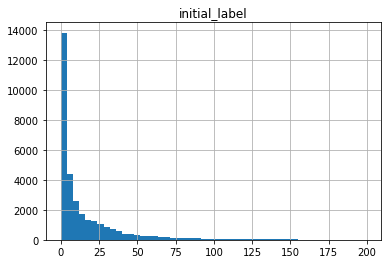

In [12]:
# plot histogram to visualize class distribution 
df.hist(column="initial_label", bins=50)

### Solutions for class imbalance 
1. Collect more data - "not possible at this moment"
1. Data Reduction - Reduce the dataset to solve a smaller classifiaction problem (resampling)
2. Data Augmentation - increasing the data synthetically for the classes with less frequencies

### Removing classes with less data and reducing the problem size
- from option 2 above

In [13]:
# copy the original data frame
df_copy = df.copy()

In [14]:
# reducing the problem to 10 classes
value_counts = df["code"].value_counts() # Specific column 
threshold = 650
to_remove = value_counts[value_counts <= threshold].index
for code in to_remove:
    df = df[df["code"] != code]
    
print(df.shape)

(19638, 3)


In [15]:
print(df["code"].value_counts())

M3      5382
M13     4045
M156    2305
M10     2096
6522    1732
M14     1136
M80      782
M68      750
M77      729
4000     681
Name: code, dtype: int64


In [16]:
def create_labels_df(df, label_column):
    # create numerical lables for training the data 
    df["label"] = np.nan
    #print(df.shape)

    value_counts = df[label_column].value_counts() # Specific column 
    code_index   = value_counts.index
    #print(code_index)
    for i, code_id in enumerate(code_index):
        df.loc[df[df[label_column] == code_id].index,"label"] = i
        
    return df

In [17]:
# create labels 
df =  create_labels_df(df,"code")

In [18]:
df.head()

,symptoms,code,initial_label,label
41,Pregnancy on oral contraceptive (finding),6522,4.0,4.0
42,Pregnancy on intrauterine device (finding),6522,4.0,4.0
43,Surrogate pregnancy (finding),6522,4.0,4.0
44,Precocious pregnancy (finding),6522,4.0,4.0
45,Pregnant - urine test confirms (finding),6522,4.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf70fbb4a8>]],
      dtype=object)

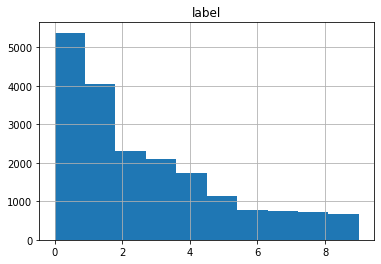

In [19]:
# To do plot histogram
df.hist(column = 'label', bins = 10)

In [20]:
# train and test split https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

def split_to_train_test(df, label_column, train_frac=0.8):
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=train_frac)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
        #print('\n%s:\n---------\ntotal:%d\ntrain_df:%d\ntest_df:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_test_df)))
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df


In [21]:
train_df, test_df = split_to_train_test(df, "label", train_frac=0.8)
print(train_df.shape, test_df.shape)

(15712, 4) (3926, 4)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
# create a vector array representing the words  
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(train_df["symptoms"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
## print the bag of words to see
#vectorizer.vocabulary_

In [25]:
print(len(vectorizer.get_feature_names()))

1232


In [26]:
# convert train and test text to vectorizer array
train_data = vectorizer.transform(train_df["symptoms"]).toarray()
test_data  = vectorizer.transform(test_df["symptoms"]).toarray()
print(train_data.shape, test_data.shape)

(15712, 1232) (3926, 1232)


In [27]:
# create train test label arrays 
train_labels = train_df["label"].to_numpy()
test_labels = test_df["label"].to_numpy()
print(train_labels.shape, test_labels.shape)

(15712,) (3926,)


In [28]:
# use tdif to give common words less importance 
transformer = TfidfTransformer()

In [29]:
# fit the tdif transform on train and test data
train_data_tfidf = transformer.fit_transform(train_data)
test_data_tfidf  = transformer.fit_transform(test_data)
print(train_data_tfidf.shape, test_data_tfidf.shape)

(15712, 1232) (3926, 1232)


In [30]:
# convert the format of train and test data to numpy array
train_data_tfidf = scipy.sparse.csr_matrix.toarray(train_data_tfidf)
test_data_tfidf  = scipy.sparse.csr_matrix.toarray(test_data_tfidf)
print(train_data_tfidf.shape, test_data_tfidf.shape)

(15712, 1232) (3926, 1232)


## Trying out to see if logistic regression solves the problem
- can also use this a base line for neural networks 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
classifier = LogisticRegression()
classifier.fit(train_data_tfidf, train_labels)
score = classifier.score(test_data_tfidf, test_labels)

print("Accuracy:", score)

Accuracy: 0.9299541518084564


/home/chaitanya/VirtualEnv/env_py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
import seaborn as sns
from sklearn import metrics

In [34]:
def plot_confusion_matrix(score, true_labels, predicted_labels, n_labels):
    confusion_matrix = metrics.confusion_matrix(true_labels,predicted_labels)
    plt.figure(figsize=(n_labels-1,n_labels-1))
    sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

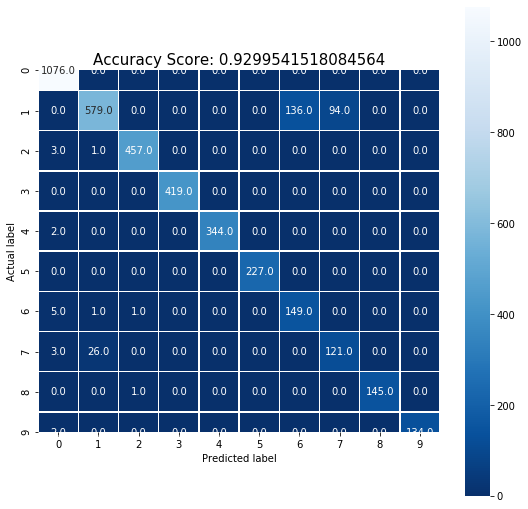

In [35]:
# plot 
plot_confusion_matrix(score, test_labels,classifier.predict(test_data_tfidf), 10)

## Moving to neural networks 
1. step 1 check if it can be solved with simple model before proceeding to deep model 

In [36]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [38]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [39]:
model.fit(train_data_tfidf, train_labels, epochs=20)

Train on 15712 samples
Epoch 1/20
15712/15712 [==============================] - 1s 74us/sample - loss: 2.2307 - accuracy: 0.6970
Epoch 2/20
15712/15712 [==============================] - 1s 47us/sample - loss: 2.0243 - accuracy: 0.7674
Epoch 3/20
15712/15712 [==============================] - 1s 48us/sample - loss: 1.8739 - accuracy: 0.7933
Epoch 4/20
15712/15712 [==============================] - 1s 51us/sample - loss: 1.7825 - accuracy: 0.8515
Epoch 5/20
15712/15712 [==============================] - 1s 48us/sample - loss: 1.7205 - accuracy: 0.8890
Epoch 6/20
15712/15712 [==============================] - 1s 52us/sample - loss: 1.6785 - accuracy: 0.9025
Epoch 7/20
15712/15712 [==============================] - 1s 52us/sample - loss: 1.6499 - accuracy: 0.9080
Epoch 8/20
15712/15712 [==============================] - 1s 50us/sample - loss: 1.6296 - accuracy: 0.9100
Epoch 9/20
15712/15712 [==============================] - 1s 50us/sample - loss: 1.6146 - accuracy: 0.9121
Epoch 10/20
15

In [40]:
_, accuracy = model.evaluate(test_data_tfidf,  test_labels, verbose=2)

3926/1 - 0s - loss: 1.5086 - accuracy: 0.9274


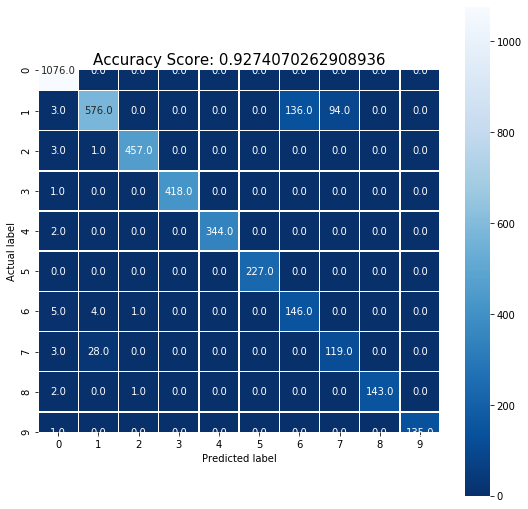

In [41]:
predictions = np.argmax(model.predict(test_data_tfidf), axis=1)
plot_confusion_matrix(accuracy, test_labels, predictions, 10 )

### Trying out a deep model with multiple hidden layers 

In [42]:
model_deep = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [43]:
model_deep.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [44]:
model_deep.fit(train_data_tfidf, train_labels, epochs=20)

Train on 15712 samples
Epoch 1/20
15712/15712 [==============================] - 3s 181us/sample - loss: 1.6095 - accuracy: 0.8613
Epoch 2/20
15712/15712 [==============================] - 2s 158us/sample - loss: 1.5410 - accuracy: 0.9201
Epoch 3/20
15712/15712 [==============================] - 3s 160us/sample - loss: 1.5397 - accuracy: 0.9215
Epoch 4/20
15712/15712 [==============================] - 3s 164us/sample - loss: 1.5395 - accuracy: 0.9216
Epoch 5/20
15712/15712 [==============================] - 3s 160us/sample - loss: 1.5392 - accuracy: 0.9218
Epoch 6/20
15712/15712 [==============================] - 3s 162us/sample - loss: 1.5397 - accuracy: 0.9213
Epoch 7/20
15712/15712 [==============================] - 3s 161us/sample - loss: 1.5381 - accuracy: 0.9232
Epoch 8/20
15712/15712 [==============================] - 3s 163us/sample - loss: 1.5309 - accuracy: 0.9303
Epoch 9/20
15712/15712 [==============================] - 3s 163us/sample - loss: 1.5305 - accuracy: 0.9306
Epoch

In [45]:
model.evaluate(test_data_tfidf,  test_labels, verbose=2)

3926/1 - 0s - loss: 1.5086 - accuracy: 0.9274


[1.5501502596840102, 0.927407]

# Inference 1
From the above three experiments, it can be said that all of the three classifiers deep, logistic, and shallow neural network have same perfromance. With the current features this might be the max achievable performance. It can also be infered that most of the data is linearly separable. 

## Trying out with more classes

Writing more functions to do single job

In [46]:
def data_processing(df, threshold):    
    # reducing the problem to 10 classes
    value_counts = df["code"].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    for code in to_remove:
        df = df[df["code"] != code]

    df =  create_labels_df(df,"code")

    train_df, test_df = split_to_train_test(df, "label", train_frac=0.8)

    # create a vector array representing the words  
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit(train_df["symptoms"])

    train_data = vectorizer.transform(train_df["symptoms"]).toarray()
    test_data  = vectorizer.transform(test_df["symptoms"]).toarray()

    train_labels = train_df["label"].to_numpy()
    test_labels = test_df["label"].to_numpy()

    transformer = TfidfTransformer()

    train_data_tfidf = transformer.fit_transform(train_data)
    test_data_tfidf  = transformer.fit_transform(test_data)

    train_data_tfidf = scipy.sparse.csr_matrix.toarray(train_data_tfidf)
    test_data_tfidf  = scipy.sparse.csr_matrix.toarray(test_data_tfidf)
    
    n_labels = len(df["code"].value_counts(dropna=False))
    
    return train_data_tfidf, train_labels, test_data_tfidf, test_labels, n_labels

In [47]:
def classifier_logisticreg(x_train, y_train, x_test, y_test, n_labels):
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    print('Test Accuracy: {0}'.format(score))
    print()
    plot_confusion_matrix(score, y_test,classifier.predict(x_test), n_labels)

In [48]:
def neural_network_classifier(x_train, y_train, x_test, y_test, n_labels, deep = False):
    if deep== True:
        model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dense(n_labels, activation='softmax')
                ])
    else:
        model = tf.keras.models.Sequential([ 
                    tf.keras.layers.Dense(n_labels, activation='softmax')
                    ])
        
    model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=20)
    _, accuracy = model.evaluate(x_test,  y_test, verbose=2)
    
    print('Test Accuracy: {0}'.format(accuracy))
    print()
    predictions = np.argmax(model.predict(x_test), axis=1)
    plot_confusion_matrix(accuracy, y_test, predictions, n_labels)

### 50 classes

In [49]:
x_train_50, y_train_50, x_test_50, y_test_50, n_labels_50 = data_processing(df = df_copy, threshold = 76)

/home/chaitanya/VirtualEnv/env_py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy: 0.8412237224406084



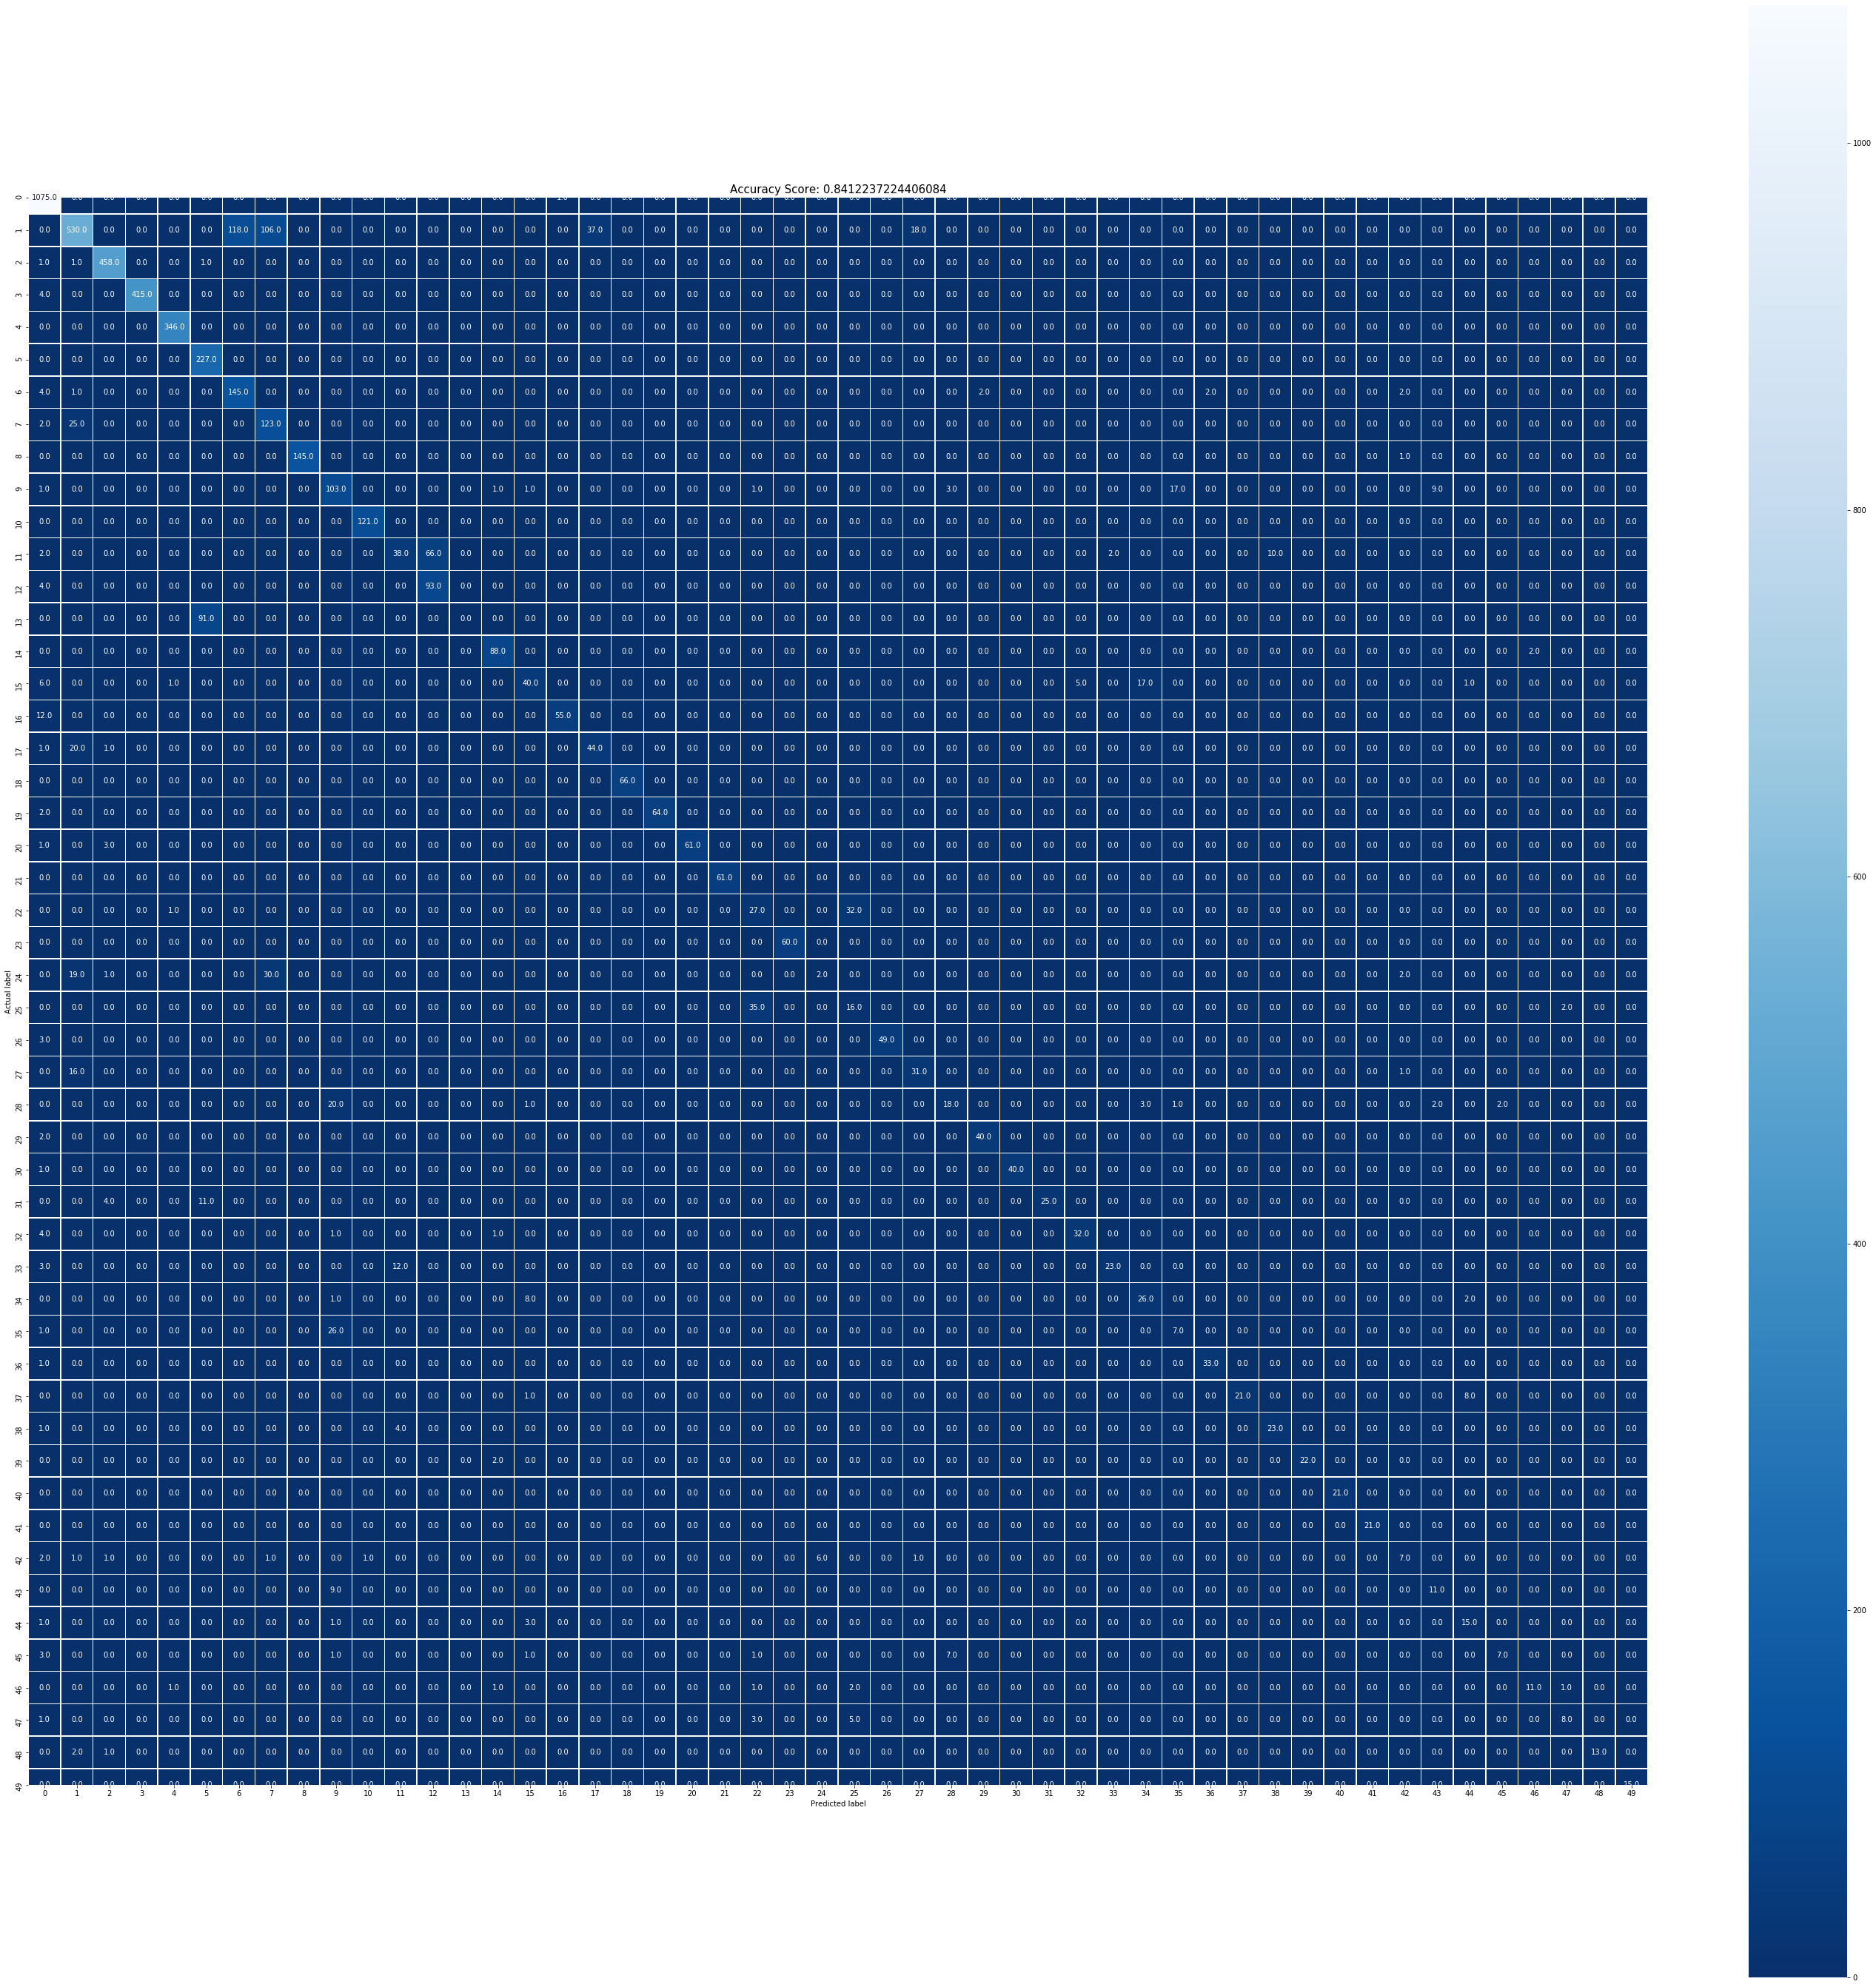

In [50]:
classifier_logisticreg(x_train_50, y_train_50, x_test_50, y_test_50, n_labels_50)

Train on 23422 samples
Epoch 1/20
23422/23422 [==============================] - 2s 78us/sample - loss: 3.8642 - accuracy: 0.5746
Epoch 2/20
23422/23422 [==============================] - 1s 58us/sample - loss: 3.6126 - accuracy: 0.5984
Epoch 3/20
23422/23422 [==============================] - 1s 60us/sample - loss: 3.4585 - accuracy: 0.6505
Epoch 4/20
23422/23422 [==============================] - 1s 61us/sample - loss: 3.3827 - accuracy: 0.6796
Epoch 5/20
23422/23422 [==============================] - 1s 61us/sample - loss: 3.3374 - accuracy: 0.7027
Epoch 6/20
23422/23422 [==============================] - 2s 65us/sample - loss: 3.3047 - accuracy: 0.7201
Epoch 7/20
23422/23422 [==============================] - 2s 70us/sample - loss: 3.2787 - accuracy: 0.7386
Epoch 8/20
23422/23422 [==============================] - 2s 68us/sample - loss: 3.2566 - accuracy: 0.7519
Epoch 9/20
23422/23422 [==============================] - 2s 67us/sample - loss: 3.2388 - accuracy: 0.7616
Epoch 10/20
23

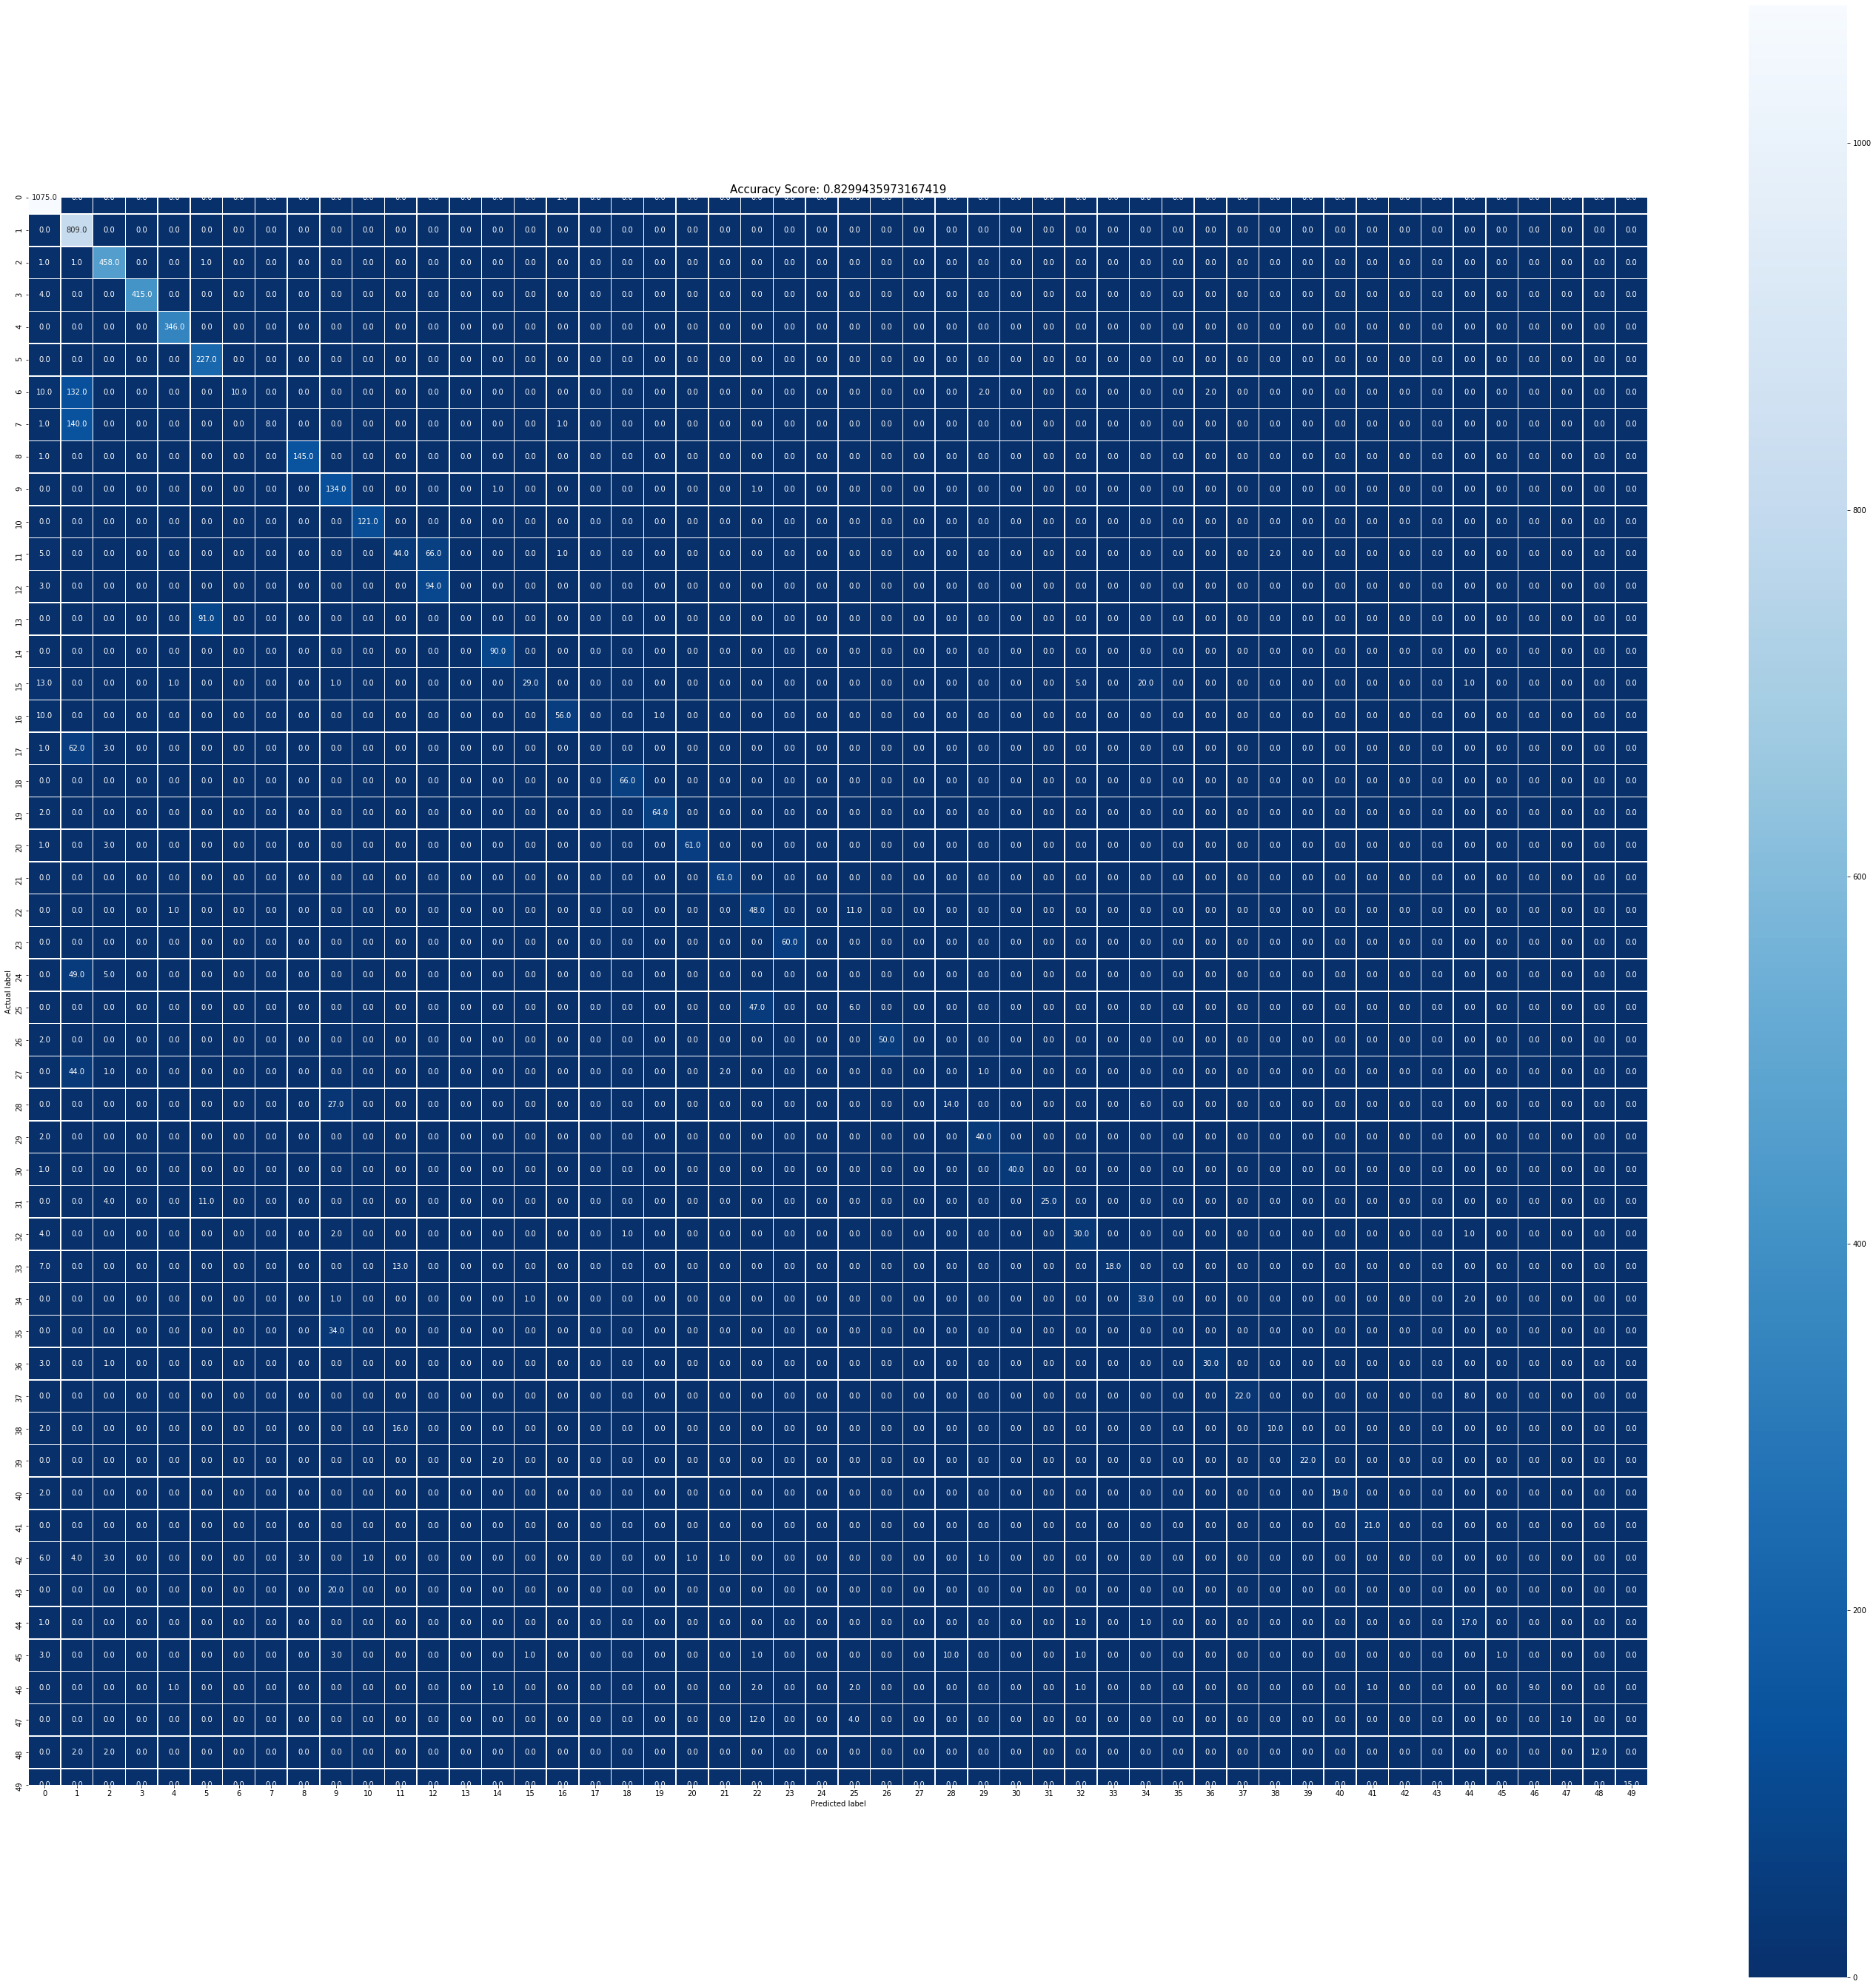

In [51]:
neural_network_classifier(x_train_50, y_train_50, x_test_50, y_test_50, n_labels_50)

### 75 classes 

In [52]:
x_train_75, y_train_75, x_test_75, y_test_75, n_labels_75 = data_processing(df = df_copy, threshold = 33)

/home/chaitanya/VirtualEnv/env_py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy: 0.832



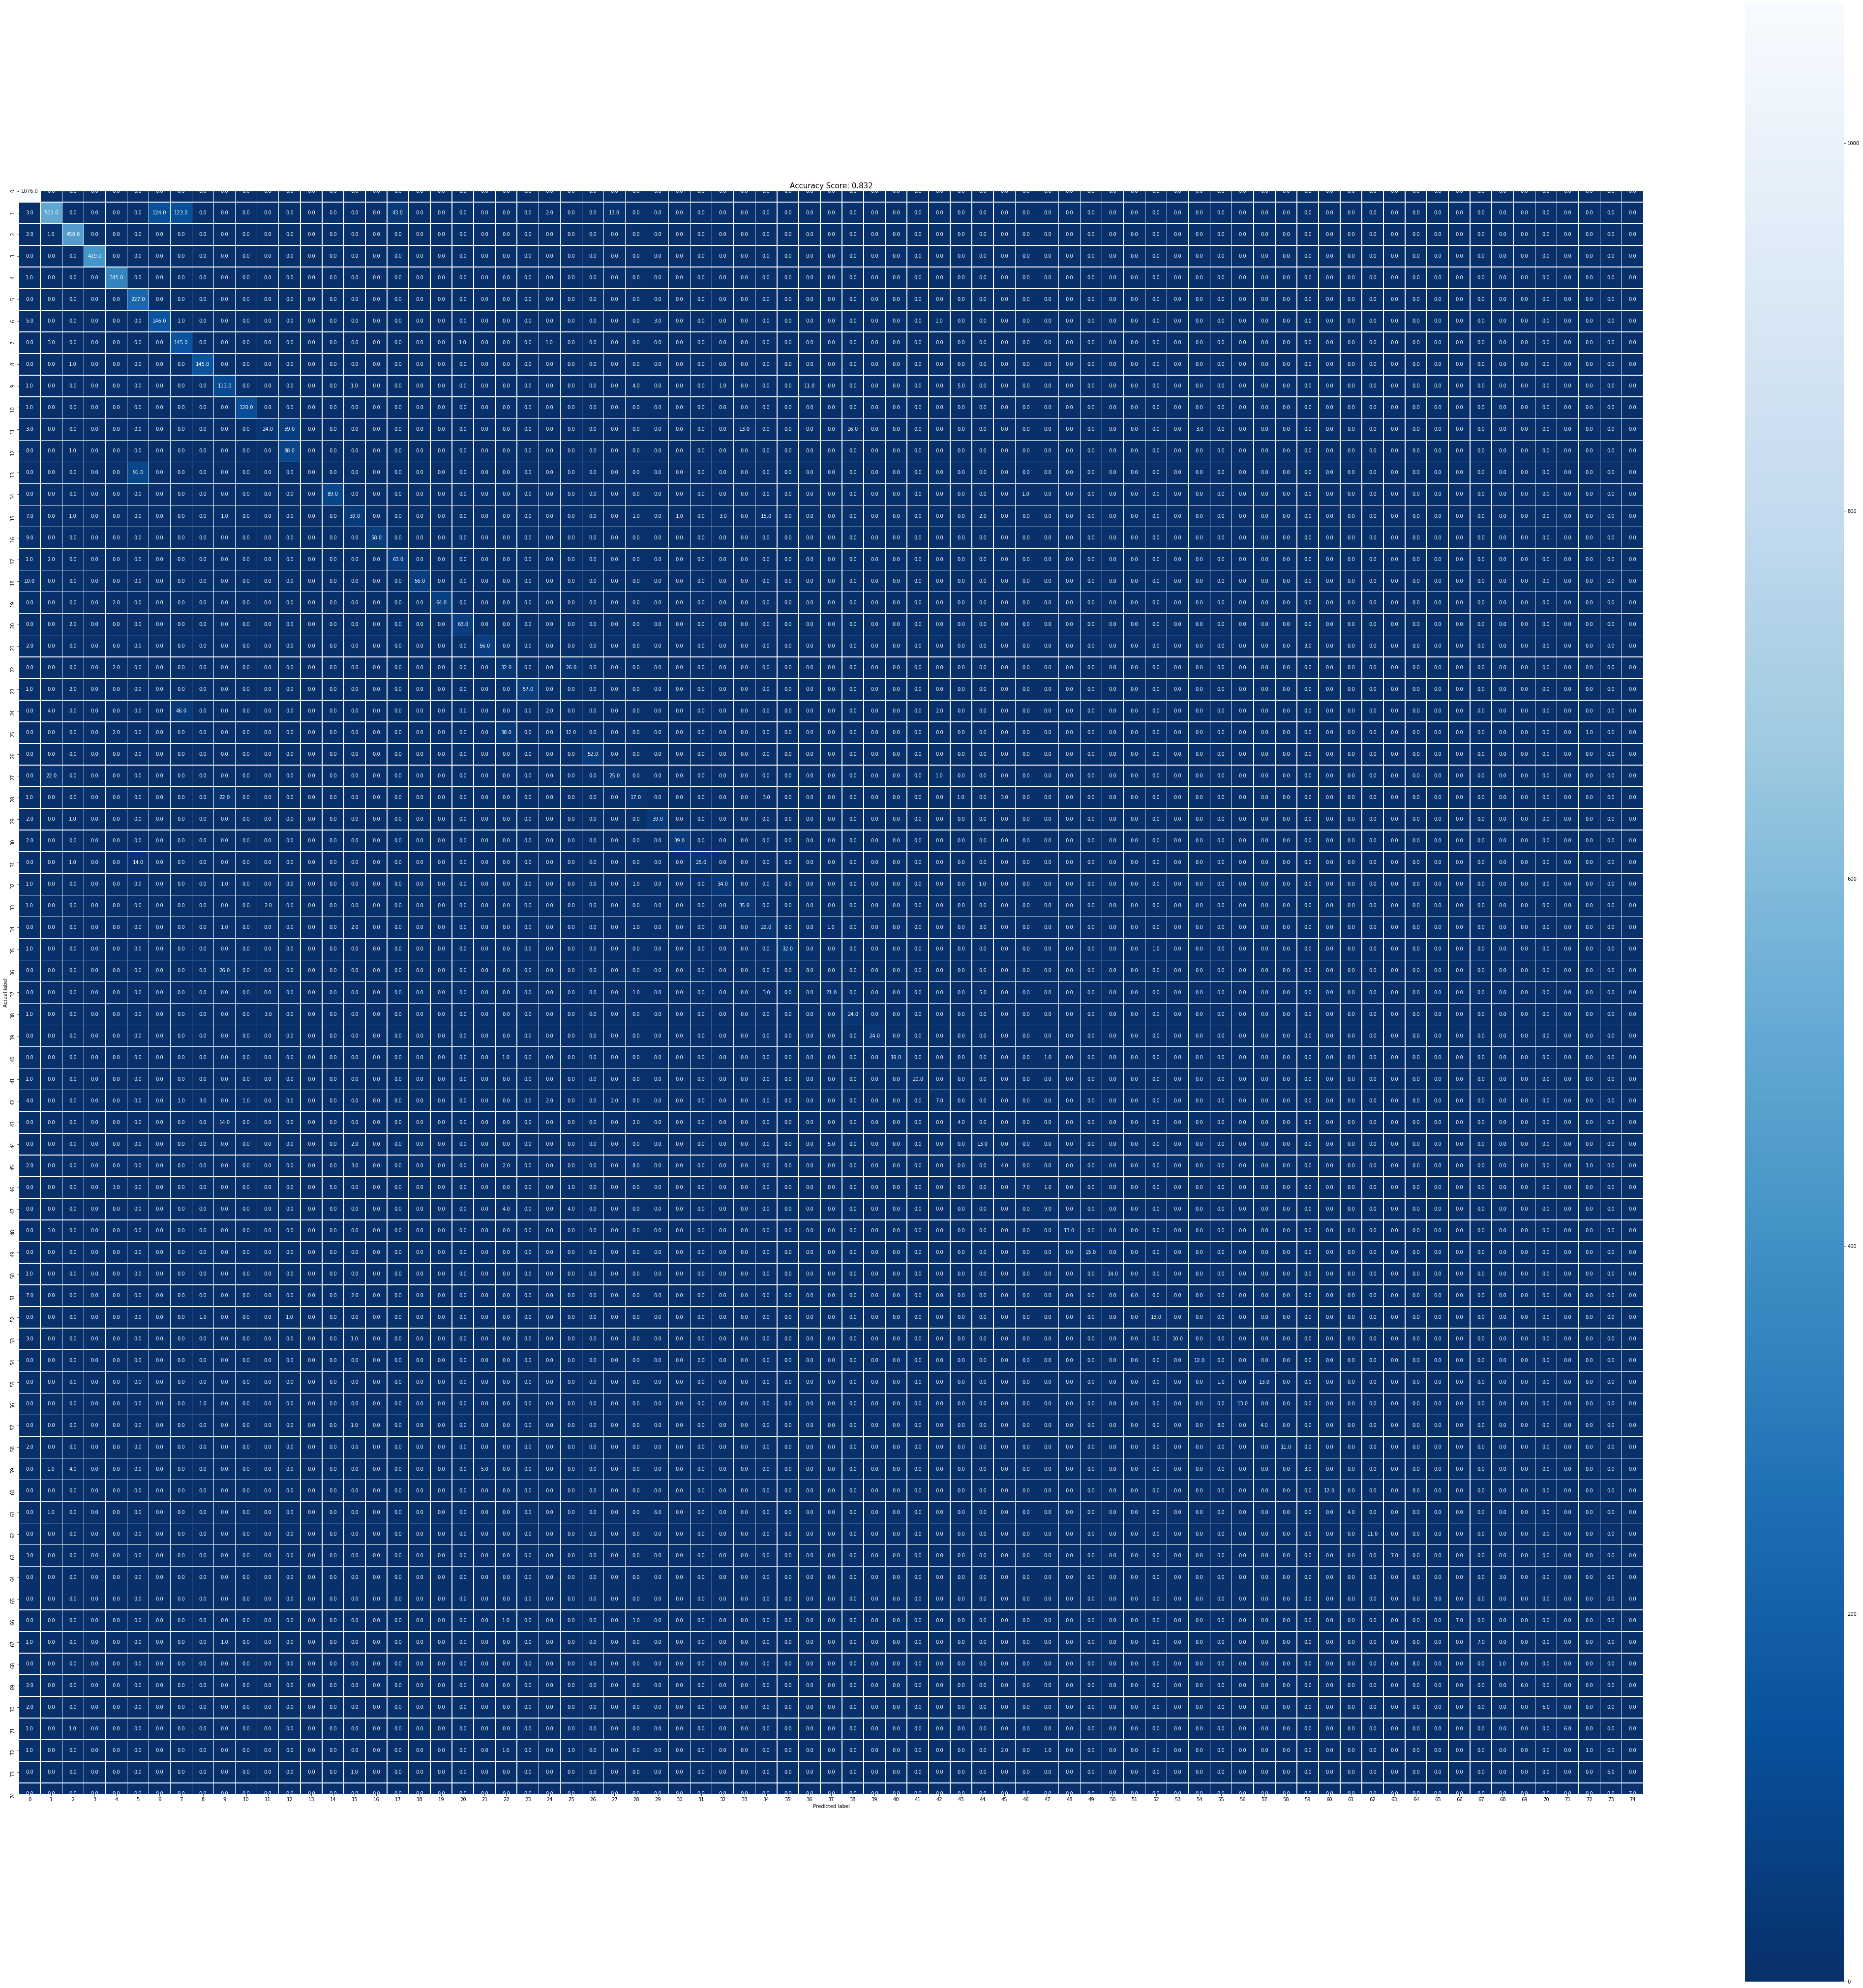

In [53]:
classifier_logisticreg(x_train_75, y_train_75, x_test_75, y_test_75, n_labels_75)

Train on 24519 samples
Epoch 1/20
24519/24519 [==============================] - 2s 79us/sample - loss: 4.2758 - accuracy: 0.5667
Epoch 2/20
24519/24519 [==============================] - 2s 68us/sample - loss: 4.0168 - accuracy: 0.5850
Epoch 3/20
24519/24519 [==============================] - 2s 68us/sample - loss: 3.8622 - accuracy: 0.6327
Epoch 4/20
24519/24519 [==============================] - 2s 68us/sample - loss: 3.7911 - accuracy: 0.6566
Epoch 5/20
24519/24519 [==============================] - 2s 69us/sample - loss: 3.7495 - accuracy: 0.6743
Epoch 6/20
24519/24519 [==============================] - 2s 69us/sample - loss: 3.7202 - accuracy: 0.6886
Epoch 7/20
24519/24519 [==============================] - 2s 66us/sample - loss: 3.6967 - accuracy: 0.7069
Epoch 8/20
24519/24519 [==============================] - 2s 66us/sample - loss: 3.6761 - accuracy: 0.7209
Epoch 9/20
24519/24519 [==============================] - 2s 70us/sample - loss: 3.6588 - accuracy: 0.7322
Epoch 10/20
24

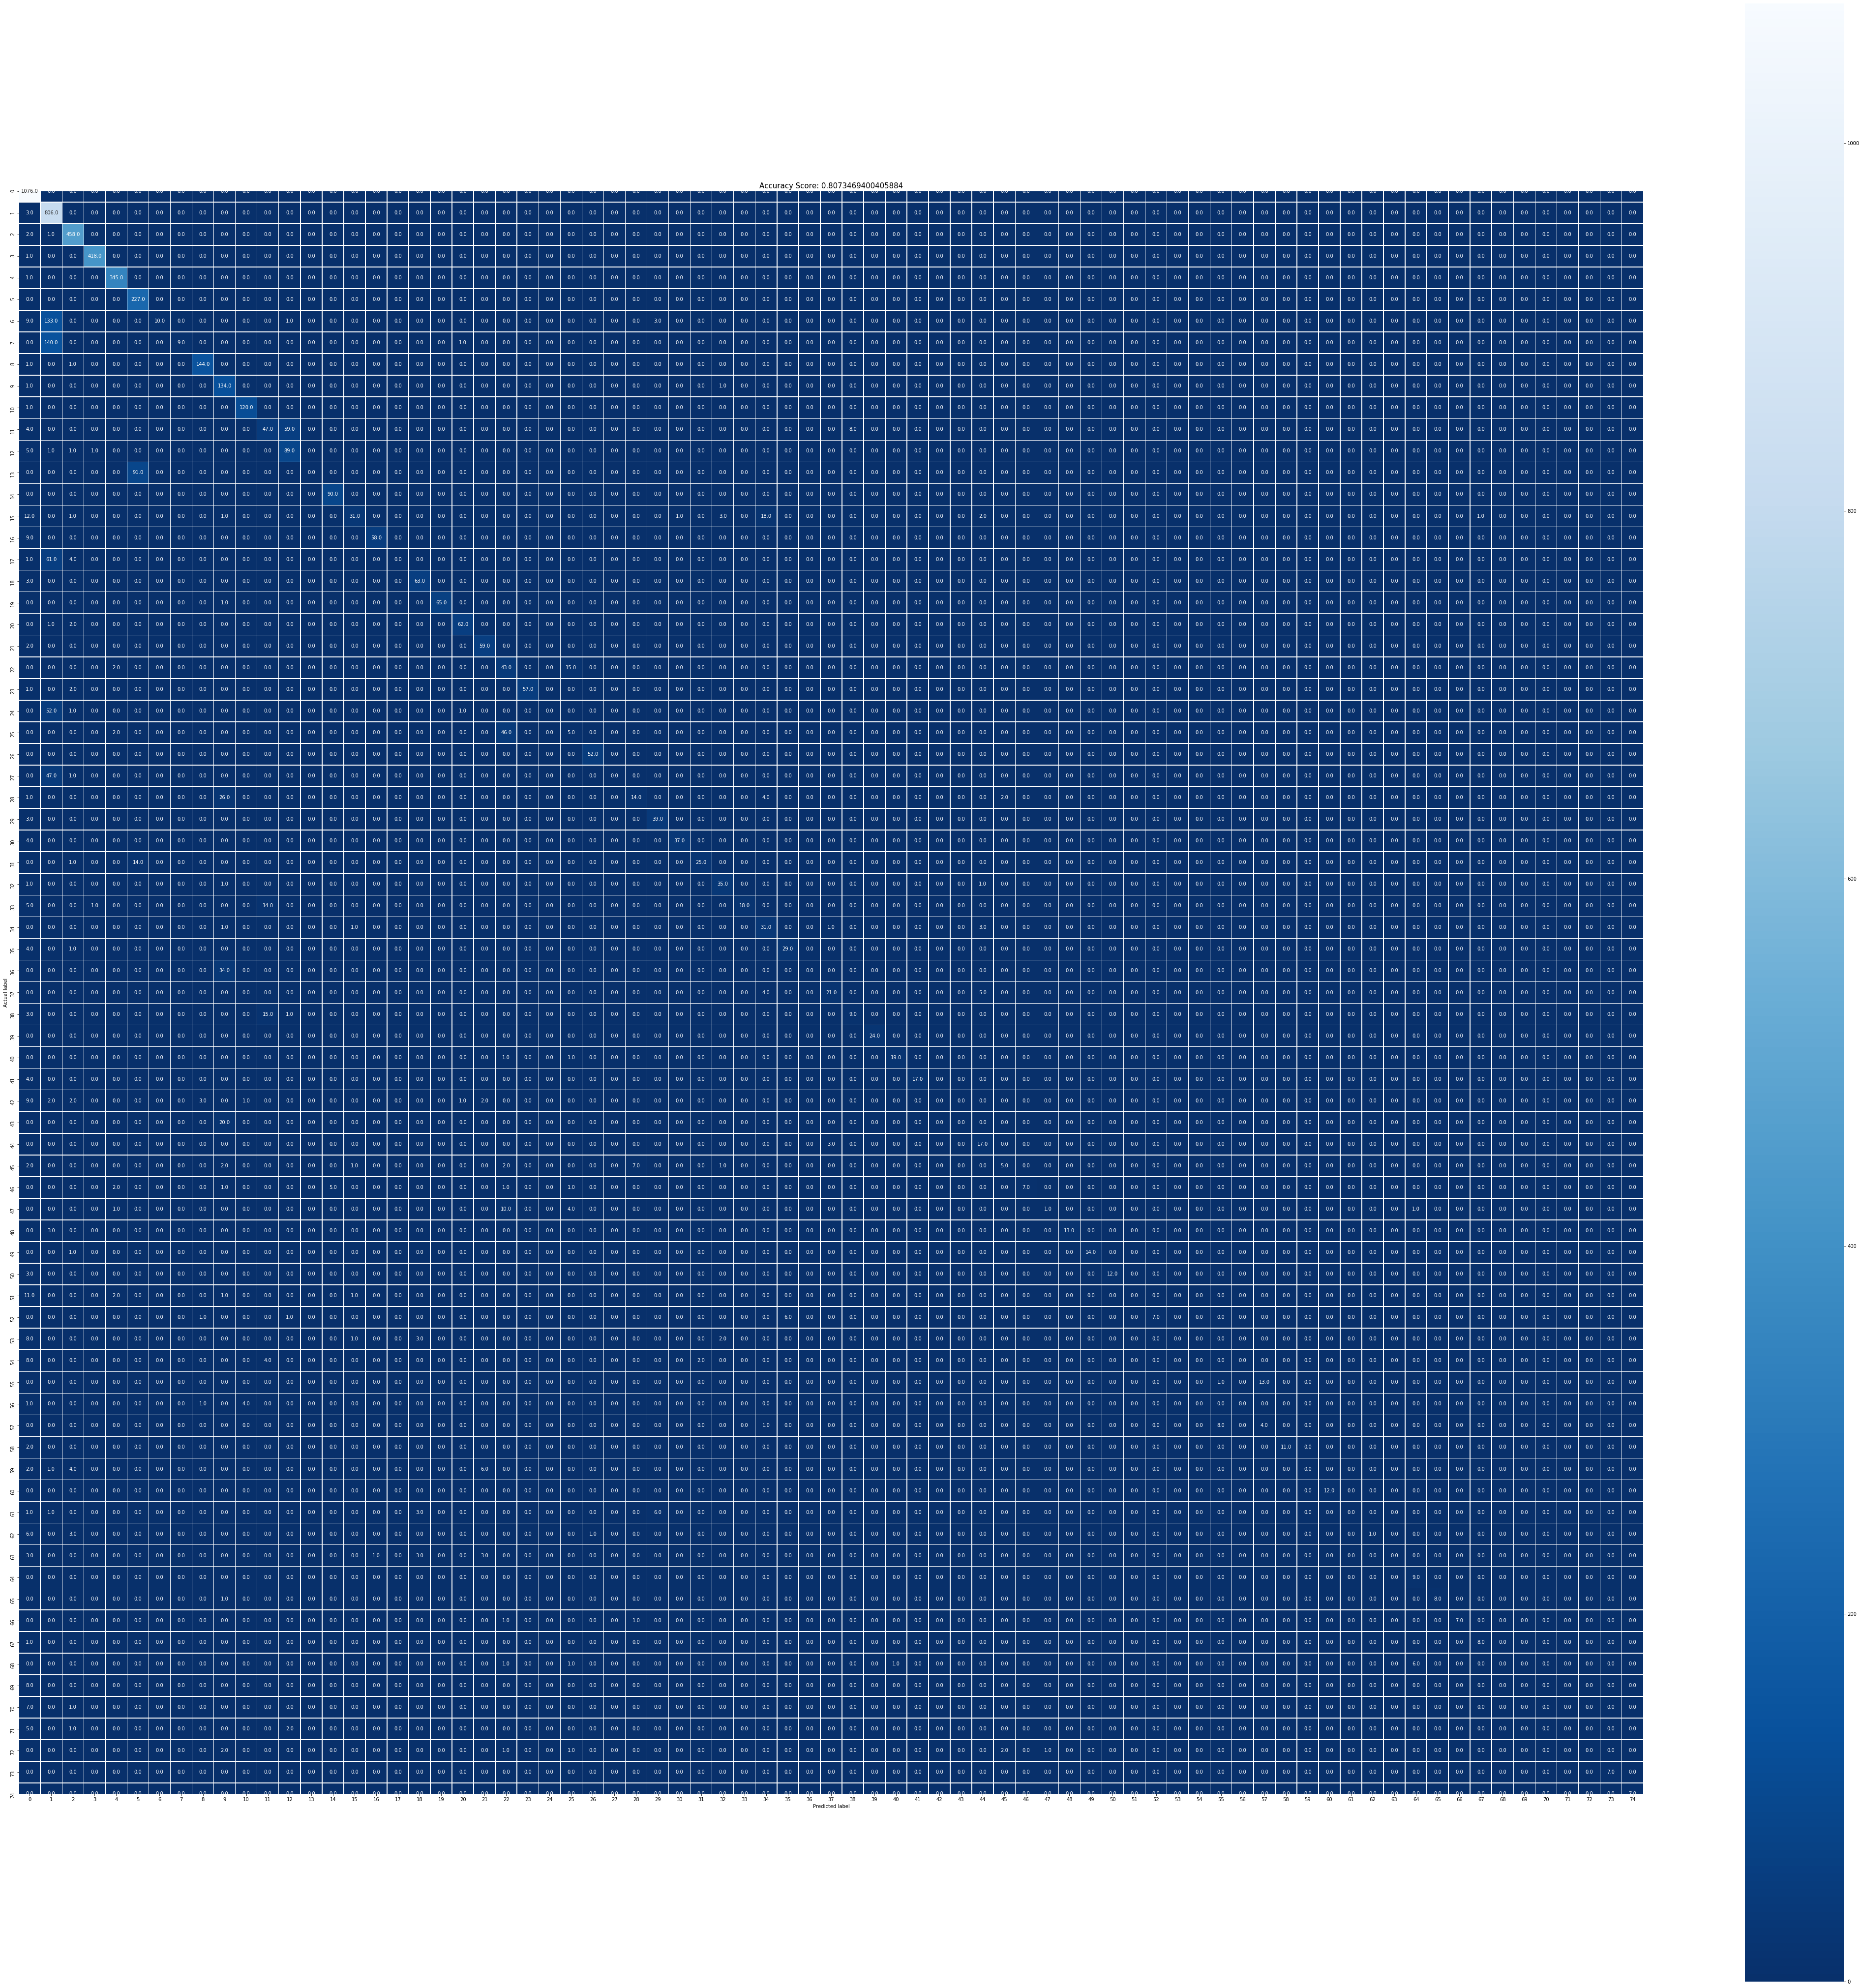

In [54]:
neural_network_classifier(x_train_75, y_train_75, x_test_75, y_test_75, n_labels_75)

# Inference 2
From the experiments with more classes also show that linear model is enough to classify this task and using complex nural networks doesnot have any improvement. Trying more classes than this also result in similar accuracy as the number of the samples from the leftover classes are very less.

# More things that can be done to improve the accuracy
1. Collect more data to reduce class imbalance.
2. Train complex model to train how to learn embeddings.
3. Use data augmentation to create equal class frequency.
4. Tu